<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [50]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [51]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0, 0.5, "Median Value (in $1000's)")

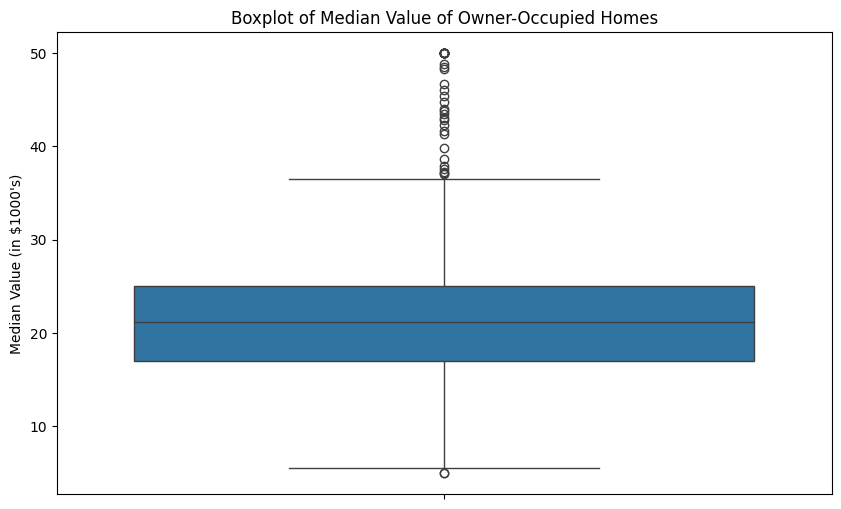

In [52]:
# boxplot for Median value of owner-occupied homes
pyplot.figure(figsize=(10, 6))
sns.boxplot(y = boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value (in $1000\'s)')

Text(0, 0.5, 'Count')

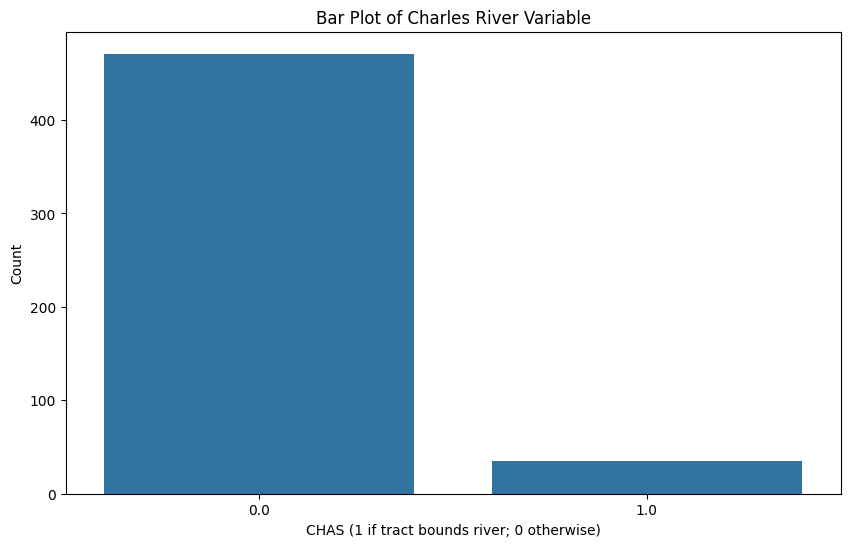

In [53]:
#Bar plot for the Charles river variable
pyplot.figure(figsize=(10, 6))
sns.countplot(x = boston_df['CHAS'])
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
pyplot.ylabel('Count')

Text(0, 0.5, "Median Value (in $1000's)")

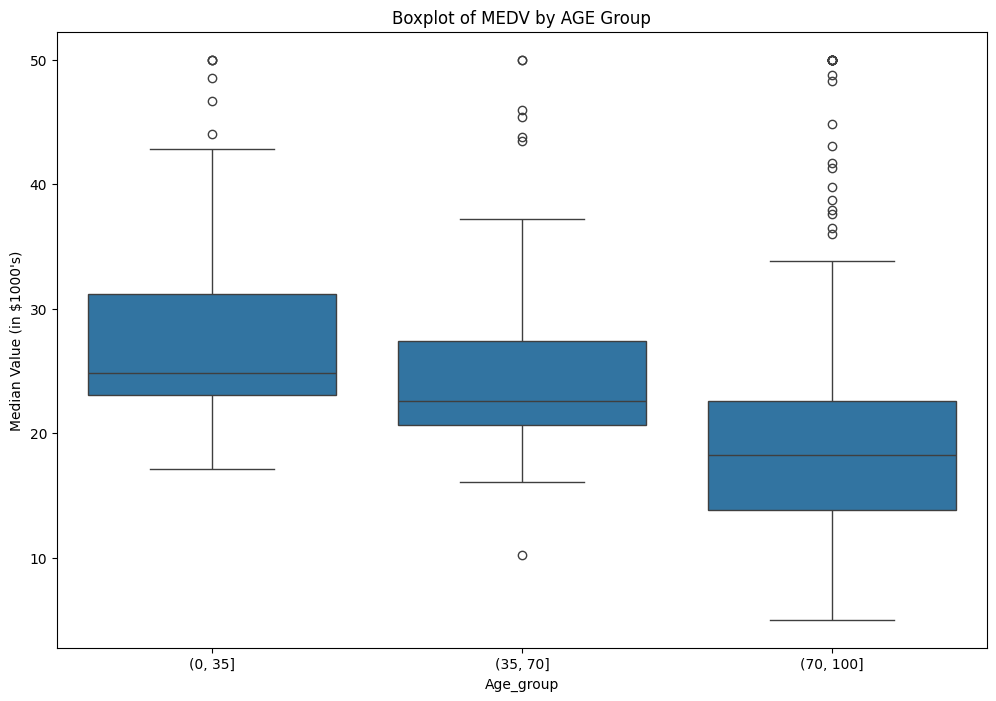

In [54]:

bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['Age_group'] = pd.cut(boston_df['AGE'],bins=bins)

pyplot.figure(figsize=(12, 8))
sns.boxplot(x='Age_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV by AGE Group')
pyplot.ylabel('Age group')
pyplot.ylabel('Median Value (in $1000\'s)')

Text(0, 0.5, 'Nitric Oxides Concentration (NOX)')

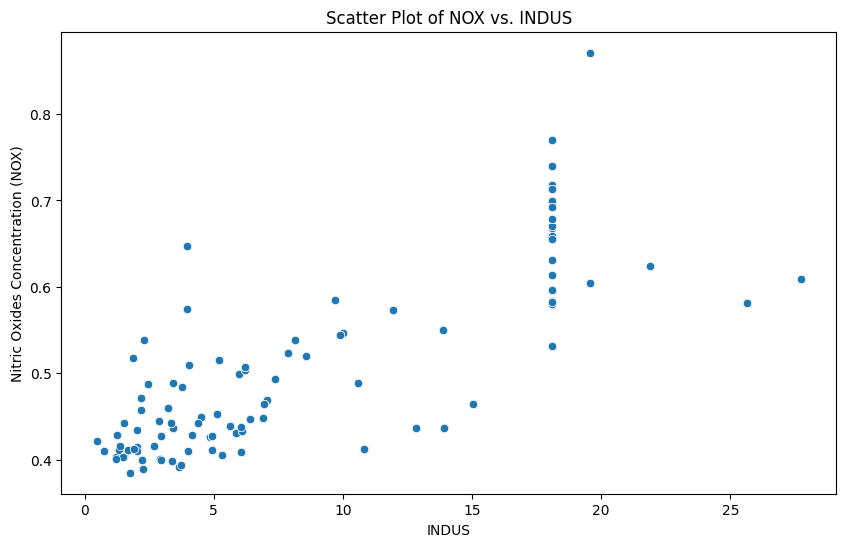

In [55]:
pyplot.figure(figsize=(10,6))
sns.scatterplot(x = 'INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of NOX vs. INDUS')
pyplot.ylabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')

Text(0, 0.5, 'Frequency')

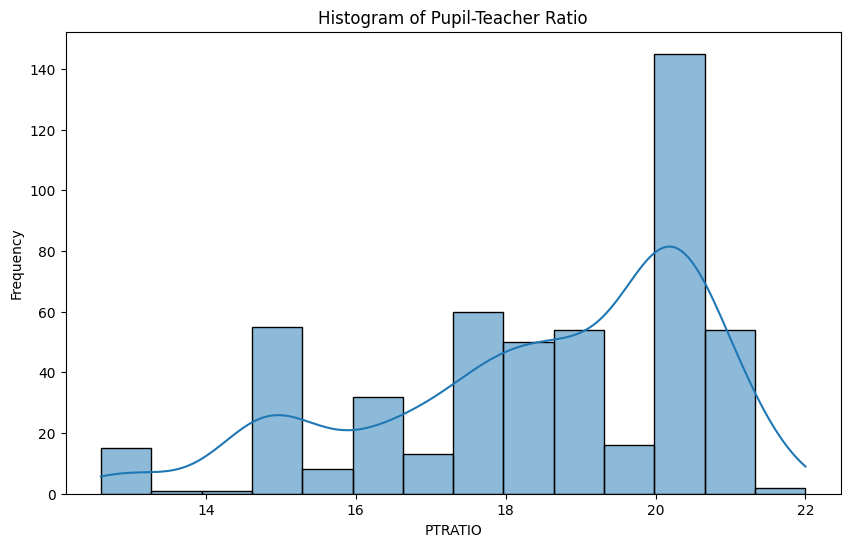

In [56]:
pyplot.figure(figsize=(10,6))
sns.histplot(boston_df['PTRATIO'],kde = True)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.ylabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')

In [57]:
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(medv_chas1, medv_chas0)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Due to P value smaller than 0.05
# There's significant difference in median value of houses 
# bounded by the Charles river or not

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [58]:
model = ols('MEDV~Age_group', data=boston_df).fit()
print(model.summary())

# Due to P value smaller than 0.05 & F-statistic = 36.41 
# There's significant difference in  Median values of houses (MEDV) 
# for each proportion of owner occupied units built prior to 1940 (AGE)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.71e-15
Time:                        11:06:23   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [59]:
pearson_corr, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

# Due to P value smaller than 0.05 & Pearson Correlation Coefficient = 0.763 
# Strong relationship between INDUS & NOX

Pearson Correlation Coefficient: 0.763651446920915
P-value: 7.913361061241532e-98


In [60]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df['DIS']  
y = boston_df['MEDV']  
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# Due to R-sqaured = 0.062 ,F-statistic = 33.57 
# coed(DIS) = 1.0916 means when distance increase 
# MEDV increase 1.0916 thousand USD
#  P << 0.05 
# As a result, if we closed enough the center of Boston
# The MEDV of houses is more expensive


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        11:06:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0